In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import PurePath
from json import load

In [88]:
SMALL_SIZE = 12
MEDIUM_SIZE = 18
BIGGER_SIZE = 26
CHONK_SIZE = 32
font = {'family' : 'DIN Condensed',
        'weight' : 'bold',
        'size'   : SMALL_SIZE}
plt.rc('font', **font)
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE, facecolor="xkcd:white")
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=CHONK_SIZE, facecolor="xkcd:white", edgecolor="xkcd:black") #  powder blue

In [89]:
def calc_model_performance(tpr, fpr, thresholds):
    performance_dict = {}
    
    # calculating auc
    performance_dict["AUC"] = np.trapz(y = tpr, x = fpr)
    
    # calculating eer
    tnr = 1 - np.array(tpr)
    scores = np.array((tnr, fpr)).T
    diffs = np.absolute(scores[:, 0] - scores[:, 1])
    min_index = np.argmin(diffs)
    lowest_threshold = thresholds[min_index]
    eer = (tnr[min_index] + fpr[min_index]) / 2
    performance_dict["EER"] = eer
    performance_dict["Threshold"] = lowest_threshold

    return performance_dict

In [90]:

def plot_ROC_curve(tpr, fpr, thresholds, performance, model_name, output_folder):
    fig, ax = plt.subplots()
    ax.fill_between(fpr, tpr)
    sns.scatterplot(x = fpr, y = tpr, ax = ax)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

    v, h = .1, .1
    ax.set_xlim(0-h, 1+h)
    ax.set_ylim(0-v, 1+v)

    # Loop through the data points 
    for i, threshold in enumerate (thresholds):
        plt.text(fpr[i], tpr[i], threshold)

    vals = [i for i in np.arange(0, 1, 0.01)]
    xp = [i for i in np.arange(1, 0, -0.01)]
    sns.lineplot(x = vals, y = vals, ax = ax, color = "red")
    sns.lineplot(x = vals, y = xp, ax = ax, color = "green")
    fig.suptitle(f"ROC Curve: {model_name}")
    fig.set_size_inches(10, 7)
    start = .2
    gap = .2
    height = 1.05
    plt.text(start, height, f"EER: {round(performance['EER'] * 100, 1)}%")
    plt.text(start + gap, height, f"Threshold: {round(performance['Threshold'], 3)}")
    plt.text(start + 2*gap + 0.05, height, f"AUC: {round(performance['AUC'], 3)}")

    plt.savefig(f"{output_folder}{model_name}.png", dpi = 400)

    pass

In [91]:
read_path = PurePath("/Users/joshuaelms/Desktop/github_repos/nsf-reu2022/data/simulation_results/tpr_fpr_Manhattan.json")
with open(read_path, "r") as f:
    data = load(f)

In [92]:
t_start, t_stop, t_step = 0, 50, 1
thresholds = [i for i in np.arange(t_start, t_stop, t_step)]
aggregate_data = {str(threshold): {"tpr": [], "fpr": []} for threshold in thresholds}
for user in data:
    for threshold in thresholds:
        threshold = str(threshold)
        tpr, fpr = data[user][threshold]["tpr"], data[user][threshold]["fpr"]
        if tpr != None:
            aggregate_data[threshold]["tpr"].append(tpr)

        if fpr != None: 
            aggregate_data[threshold]["fpr"].append(fpr)

In [93]:
for threshold in aggregate_data:
    aggregate_data[threshold]["tpr"] = np.array(aggregate_data[threshold]["tpr"]).mean(axis = 0)
    aggregate_data[threshold]["fpr"] = np.array(aggregate_data[threshold]["fpr"]).mean(axis = 0)

In [94]:
aggregate_data

{'0': {'tpr': 0.0, 'fpr': 0.0},
 '1': {'tpr': 0.10386690862519687, 'fpr': 0.030497484198763247},
 '2': {'tpr': 0.3064350659269992, 'fpr': 0.1444860905145205},
 '3': {'tpr': 0.4749036800968872, 'fpr': 0.2953550101560368},
 '4': {'tpr': 0.5940440193588125, 'fpr': 0.4293186602608438},
 '5': {'tpr': 0.6706048453230735, 'fpr': 0.5400579664709843},
 '6': {'tpr': 0.7237032432859715, 'fpr': 0.6306525872678113},
 '7': {'tpr': 0.7614765685450064, 'fpr': 0.6990440689119959},
 '8': {'tpr': 0.7897305147737644, 'fpr': 0.7549655465837322},
 '9': {'tpr': 0.8102887863591376, 'fpr': 0.7965483511203767},
 '10': {'tpr': 0.8259665373089234, 'fpr': 0.8290970679323597},
 '11': {'tpr': 0.8401407137853149, 'fpr': 0.8566489116233112},
 '12': {'tpr': 0.8523883917906308, 'fpr': 0.8781499604252782},
 '13': {'tpr': 0.8657596143082669, 'fpr': 0.8935853372955853},
 '14': {'tpr': 0.873579833893389, 'fpr': 0.9060834467489234},
 '15': {'tpr': 0.8823659950272651, 'fpr': 0.9152544316390385},
 '16': {'tpr': 0.8919050776119

In [95]:
tpr = []
fpr = []

for key, value in aggregate_data.items():
    tpr.append(value["tpr"])
    fpr.append(value["fpr"])

In [96]:
performance = calc_model_performance(tpr, fpr, thresholds)

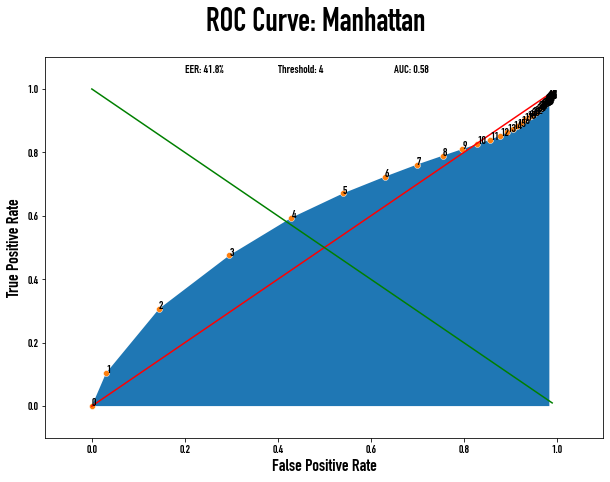

In [97]:
plot_ROC_curve(tpr, fpr, thresholds, performance, "Manhattan", "/Users/joshuaelms/Desktop/github_repos/nsf-reu2022/continuous_authentication/simulation/")